# Fourier Transforms

Based on lectures by Nils Halversson at CU Boulder

# Importance of FTs

 * Antenna theory:
  *  The farfield beam pattern is the FT of the antenna illumination pattern
 * Optics:
  *   An FT relation exists between back and front focal points of a converging lens. For example: a plane wave is transformed into a delta function. A lens is therefore a Fourier transform device.
 * Quantum mechanics
  * There is an FT relation between a particles position $\vec{x}$ and its momentum $\vec{p}$
 * Probability
  * If x, y are independent random variables, if we define a new random variable $z = x + y$, then the PDF of z is $f_z(z) = \int_{−∞}^{∞} dx f_x(x) f_y(z − x)$
  * In otherwords, the PDF of a sum of two random variables is a convolution
 * Interferometry
  * The output of an interferometer is the FT of the sky intensity distribution.
 * Signal processing and filtering
  * Much of filtering is done in the (spatial or temporal) frequency domain.
 * Spectroscopy
  * Many types of spectrometer: grating, Fabry-Perot, Fourier transform spectrometer (FTS), work on the principle of coherent wave interference, which can be understood with Fourier transforms.

In [2]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')

In [3]:
import numpy as np

Definition:

The Fourier transform $F(t)$ of a function $f(\nu)$, also written $FT\{f(\nu)\}$, is

$$FT\{f(\nu)\} = F(t) = \int_{-\infty}^\infty f(\nu) e^{-2\pi i \nu t} d \nu $$

giving an inverse
$$\tilde{FT}\{F(t)\} = f(\nu) = \int_{-\infty}^\infty F(t) e^{+2\pi i \nu t} d t $$

## Proof that these are inverses

Exercise:

plug one into the other and prove you get an equality

# Simple Fourier Transforms

Sines and cosines:

If $f(\nu) = \cos \nu$, then the Fourier transform of $f$ is:

$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$




Eusing Euler's formula
$$e^{i \nu} = \cos \nu + i\sin \nu$$
$$e^{-i \nu} = \cos \nu - i\sin \nu$$

we get $\cos \nu$:
$$\frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) = \cos \nu $$


We can substitute our expression for $\cos \nu = \frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) $
 into
$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$


to get
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) e^{-2 i \pi t \nu} d\nu$$

Combining terms, we get:
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu-2 i \pi t \nu} + e^{-i \nu-2 i \pi t \nu}\right)  d\nu$$

Which, with a little more manipulation, becomes:
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu(1-2 \pi t)} + e^{-i \nu(1+2  \pi t )}\right)  d\nu$$

We can inspect this equation a bit to see what it tells us.
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu(1-2 \pi t)} + e^{-i \nu(1+2  \pi t )}\right)  d\nu$$

If we re-expand using Euler's rules, it becomes
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left[\cos(\nu(1-2 \pi t)) -i\sin(\nu(1-2 \pi t)) + \cos(\nu(1+2  \pi t )) + i\sin(1+2  \pi t )) \right]  d\nu$$

The integral of the $\sin$ terms can be ignored; formally the integral doesn't exist, but the positive and negative area are the same so it goes to zero.

The cosine terms:

$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left[\cos(\nu(1-2 \pi t)) + \cos(\nu(1+2  \pi t ))  \right]  d\nu$$

This integral does not exist _except_ when $1-2 \pi t = 0$ or $1+2 \pi t = 0$, since $\cos 0 = 1$.

$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$

$F(t) = 0$ unless $t=\frac{1}{2\pi}$ or $t=-\frac{1}{2\pi}$, in which case it is 1

$$F(t) = FT\{\cos \nu\} = \delta\left(t\pm\frac{1}{2\pi}\right)$$

$\delta$ is the [Dirac Delta](https://en.wikipedia.org/wiki/Dirac_delta_function)

# The Dirac Delta

You need to know these properties:

$$\delta(x) \simeq \begin{cases} +\infty, & x = 0 \\ 0, & x \ne 0 \end{cases}$$


$$\int_{-\infty}^\infty \delta(x) \, \mathrm dx = 1$$


$$\int_{-\infty}^\infty f(t) \,\delta(t-T)\,\mathrm dt = f(T)$$


# Fourier Transform Pairs

Rather than derive more solutions, we'll show what some solutions look like.

Start with cosine.  

The pair is $FT\{\cos \nu/\nu_0\} = \delta\left(t\pm\frac{1}{2\pi \nu_0}\right)$.  When evaluating the $\delta$ in a discrete Fourier tranform (i.e., on actual data), we draw it as a single spike.

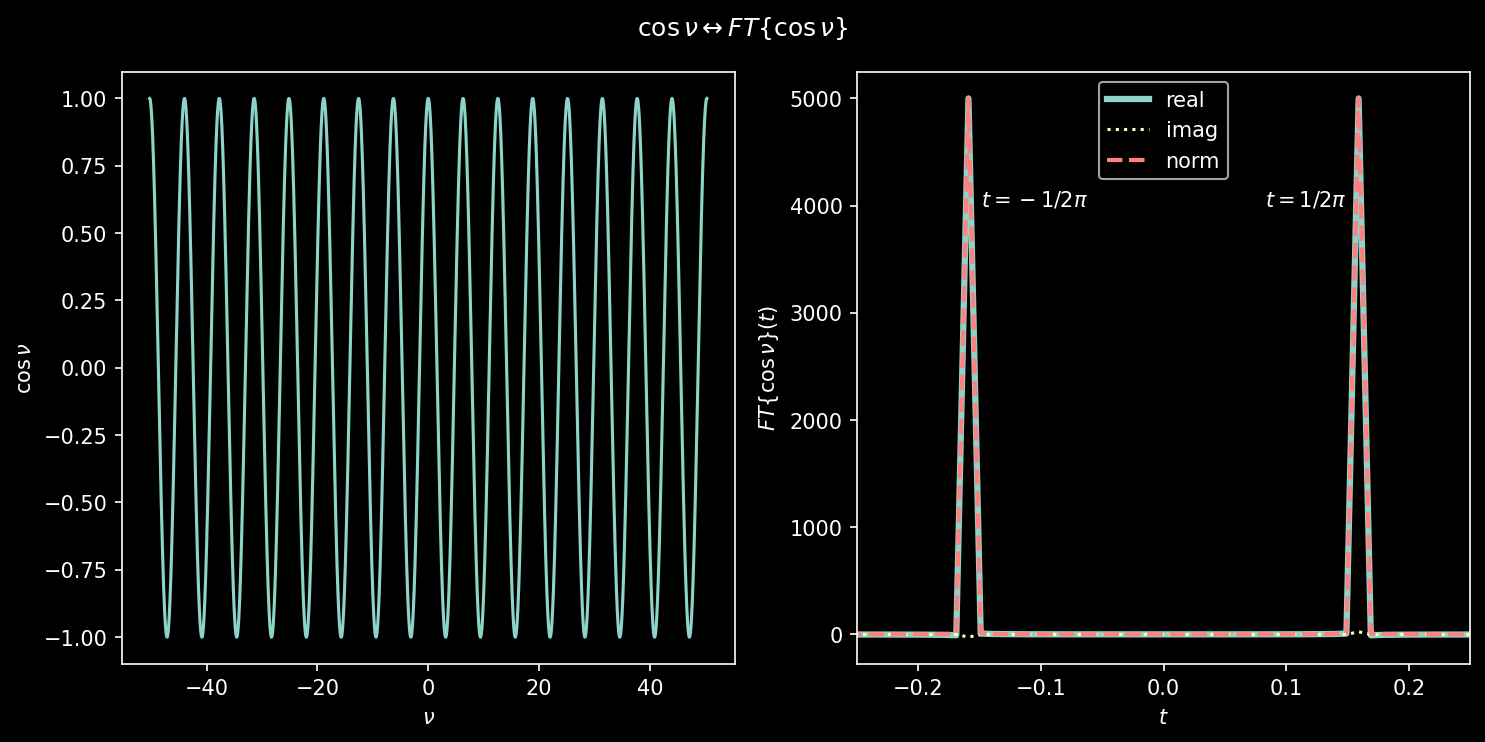

In [43]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.cos(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real', linewidth=3)
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color=(1,0.5,0.5), alpha=1, linewidth=2)
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
pl.legend(loc='best')
ax2.set_xlim([-0.25, 0.25]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\cos \nu\}(t)$');
pl.suptitle(r"$\cos\nu \leftrightarrow FT\{\cos \nu\}$");
pl.tight_layout()

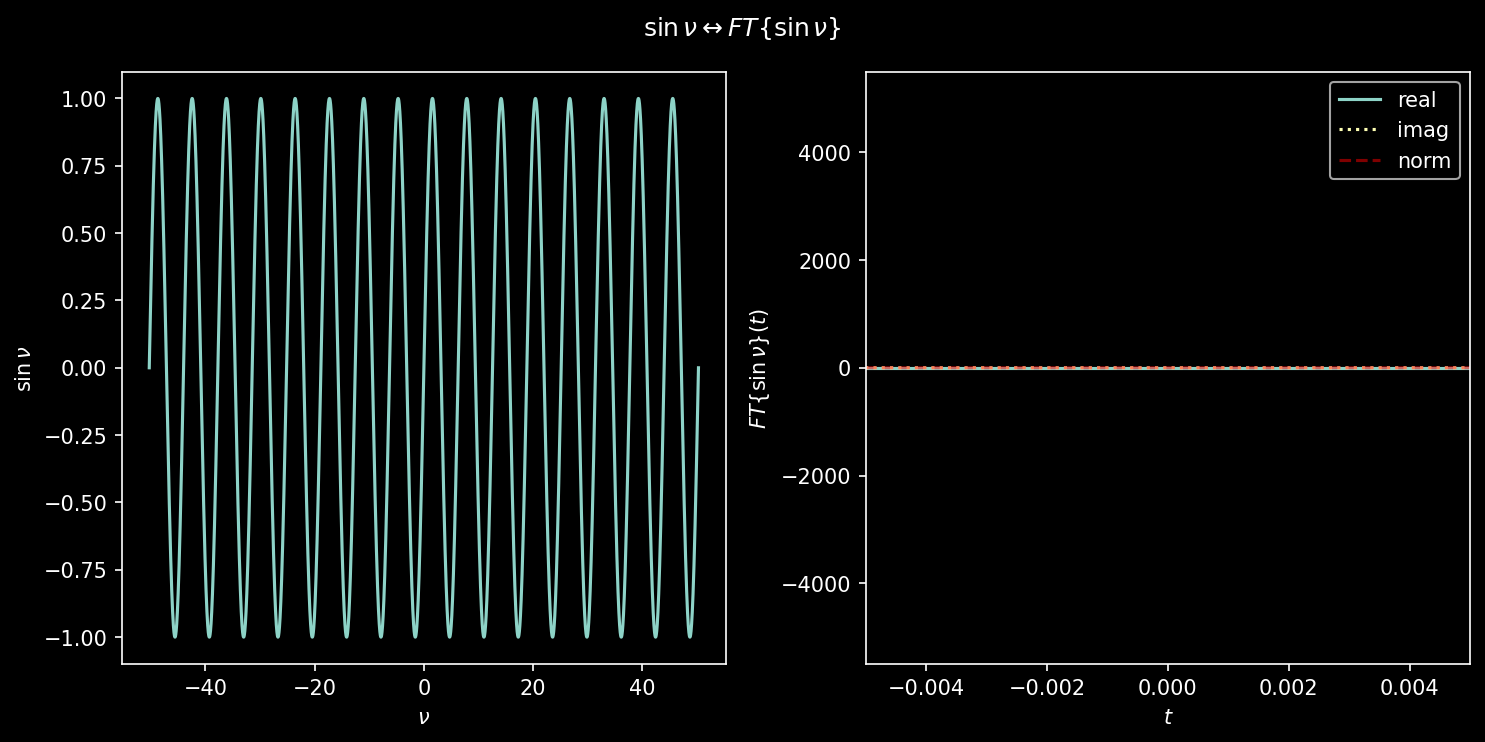

In [180]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.sin(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\sin\nu$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\sin \nu\}(t)$');
pl.suptitle(r"$\sin\nu \leftrightarrow FT\{\sin \nu\}$");
pl.tight_layout()

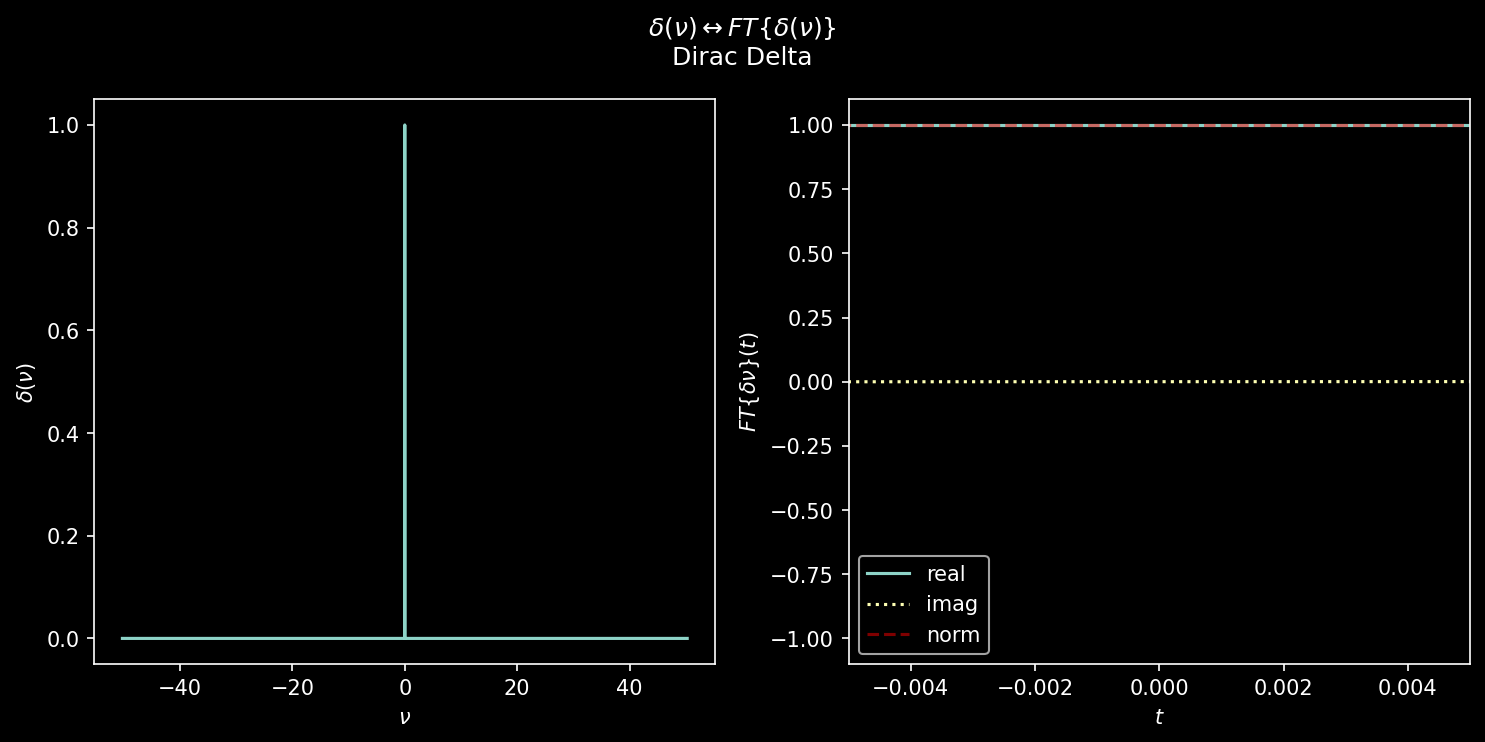

In [181]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.zeros_like(nu)
y[np.argmin(np.abs(nu))] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$\delta(\nu) \leftrightarrow FT\{\delta(\nu)\}$"
            "\nDirac Delta");
pl.tight_layout()

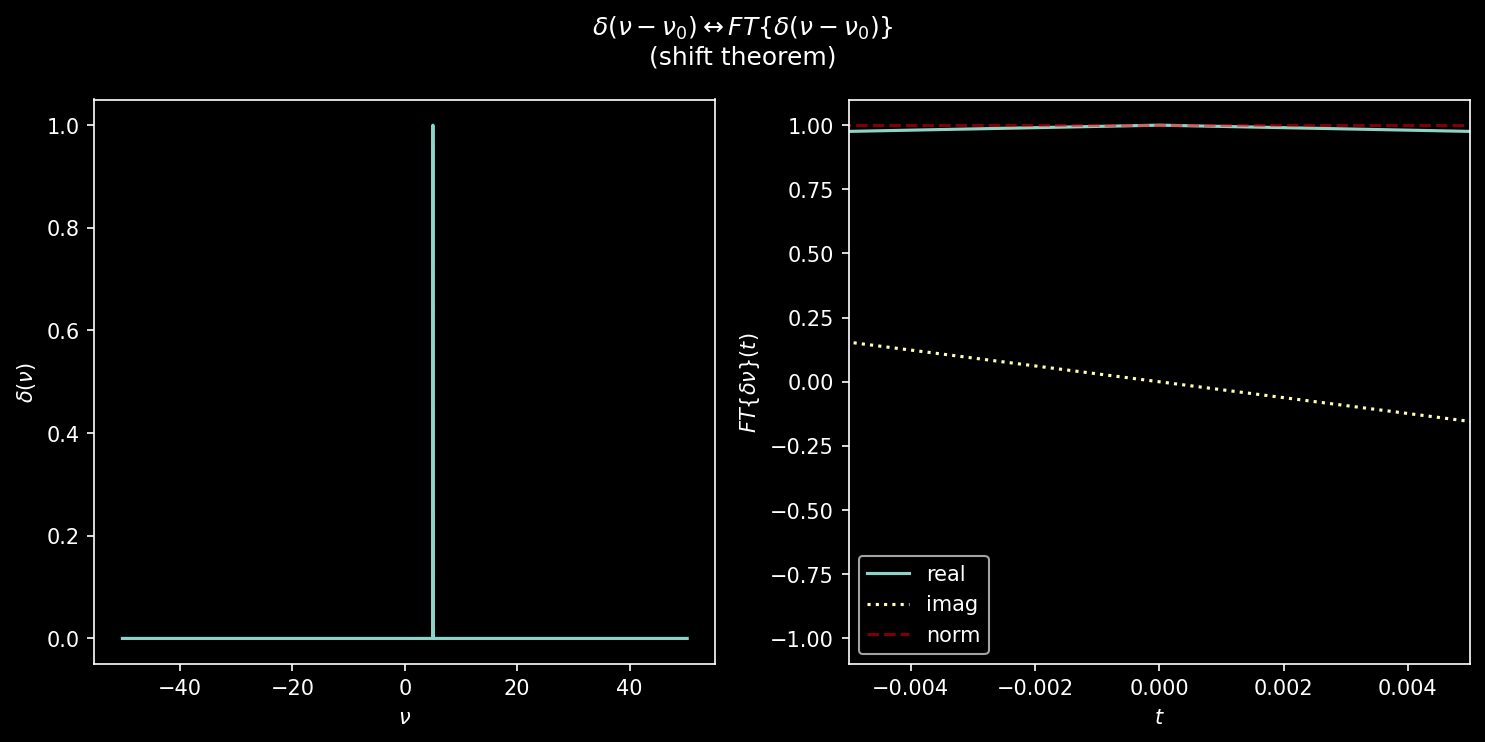

In [182]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.zeros_like(nu)
y[np.argmin(np.abs(nu - 5))] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$\delta(\nu-\nu_0) \leftrightarrow FT\{\delta(\nu-\nu_0)\}$"
            "\n(shift theorem)");
pl.tight_layout()

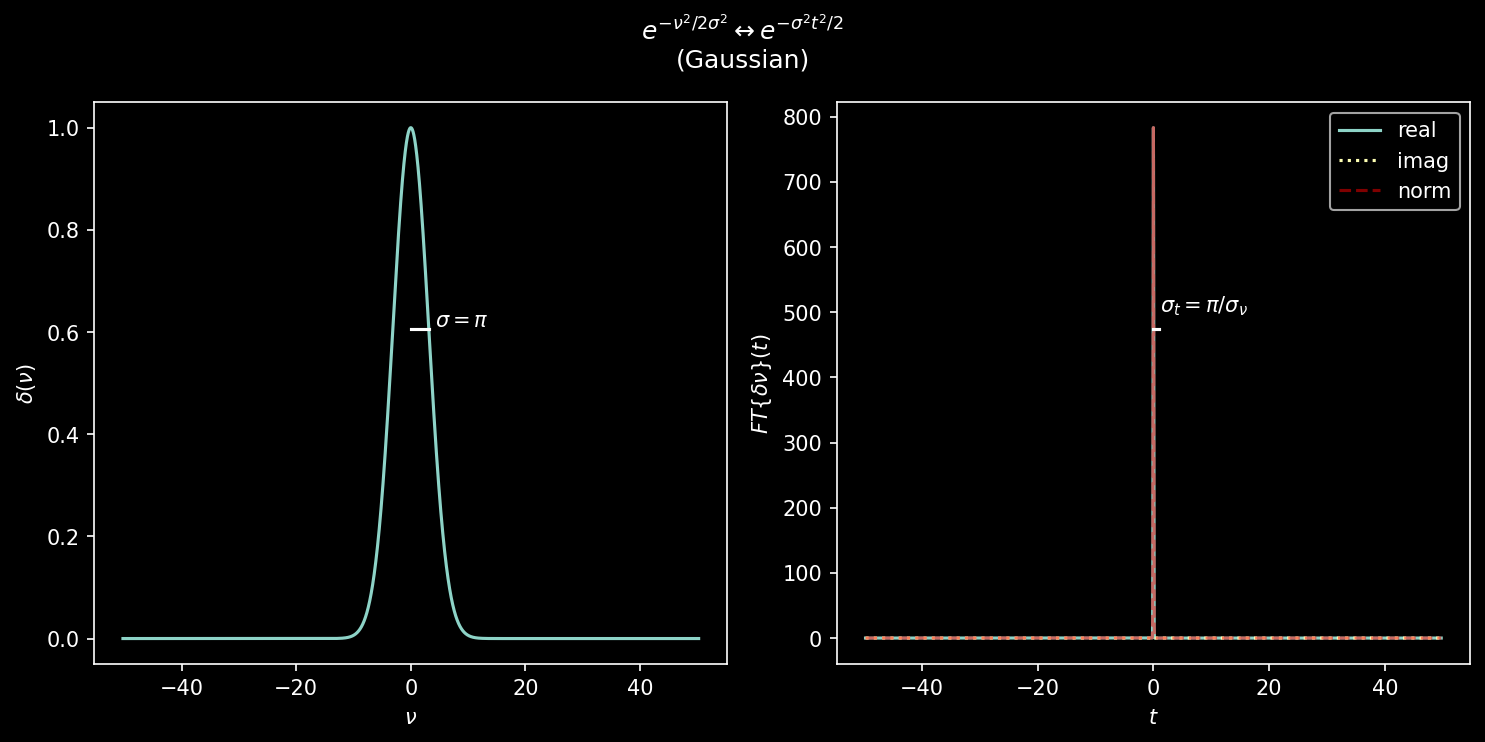

In [186]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1]-nu[0]
y = np.exp(-(nu)**2/(2*np.pi**2))
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax1.plot([0, np.pi], [0.606, 0.606], 'w')
ax1.text(np.pi+1, 0.61, '$\sigma=\pi$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
ax2.plot([0, 1], [0.606*y.sum(), 0.606*y.sum()], 'w')
ax2.text(1+0.1, 500, '$\sigma_t=\pi/\sigma_\\nu$')# CORRECT THIS
pl.suptitle(r"$e^{-\nu^2/2\sigma^2} \leftrightarrow e^{-\sigma^2 t^2/2}$"
            "\n(Gaussian)");
pl.tight_layout()

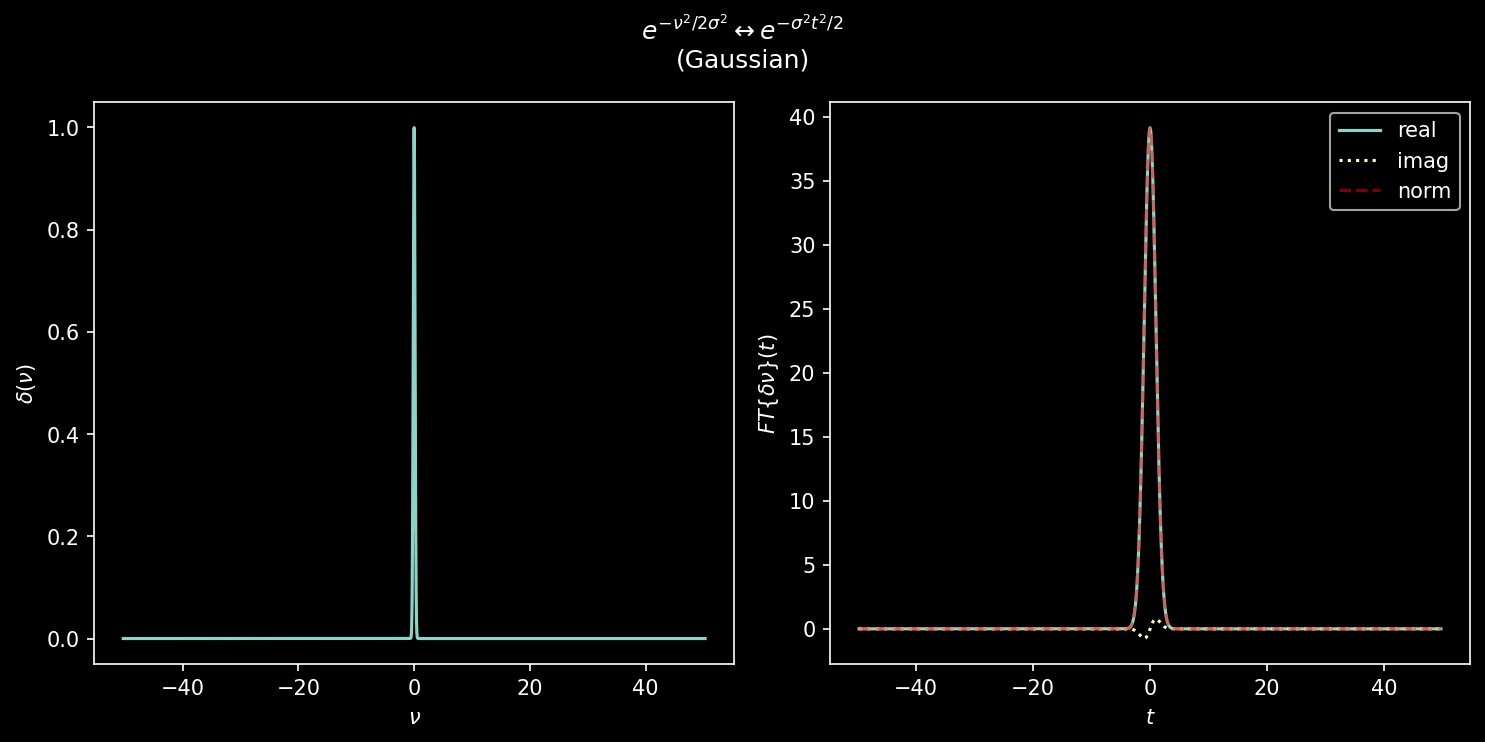

In [184]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.exp(-(nu)**2/(2*(0.05*np.pi)**2))
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$e^{-\nu^2/2\sigma^2} \leftrightarrow e^{-\sigma^2 t^2/2}$"
            "\n(Gaussian)");
pl.tight_layout()

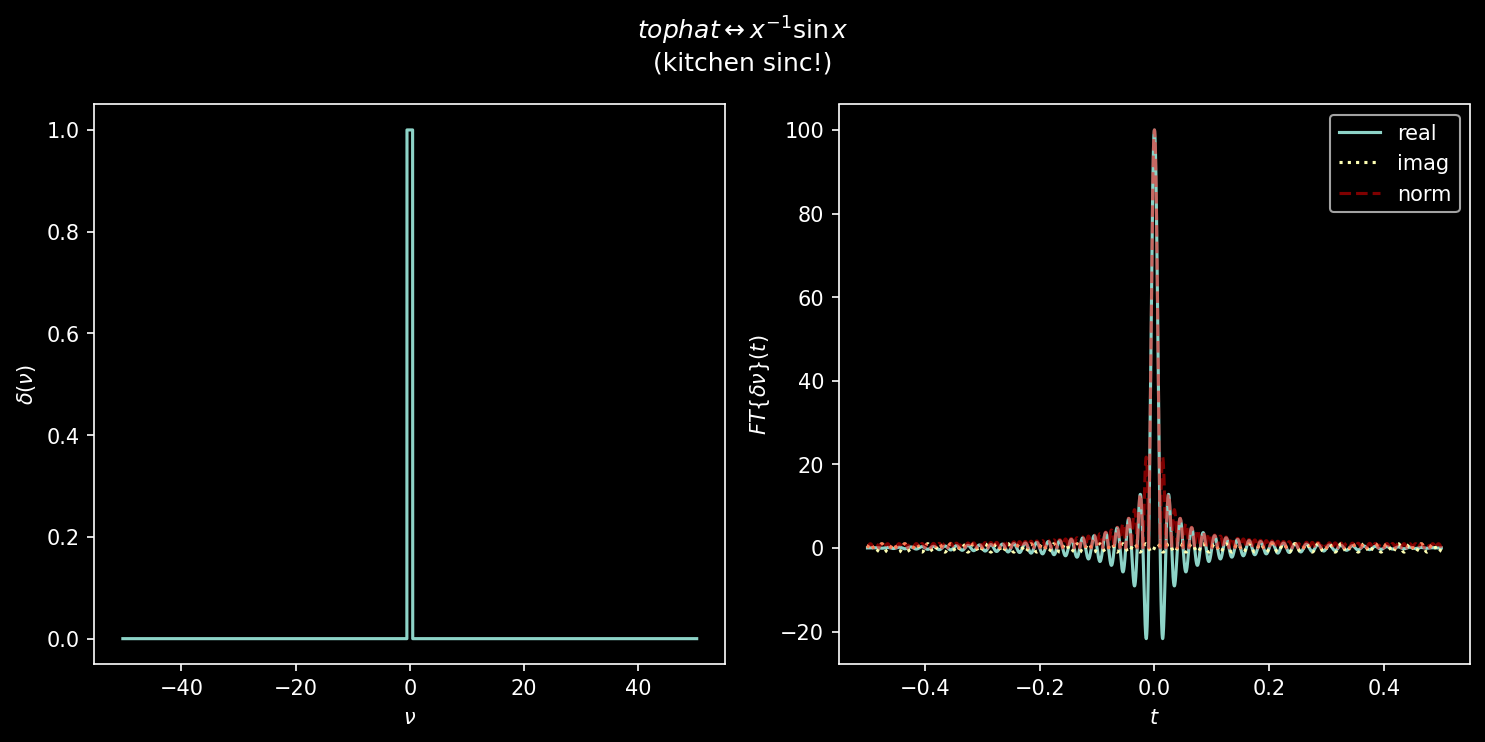

In [166]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.zeros_like(nu)
y[np.abs(nu)<.5] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size)
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$tophat \leftrightarrow x^{-1} \sin x$"
            "\n(sinc)");
pl.tight_layout()

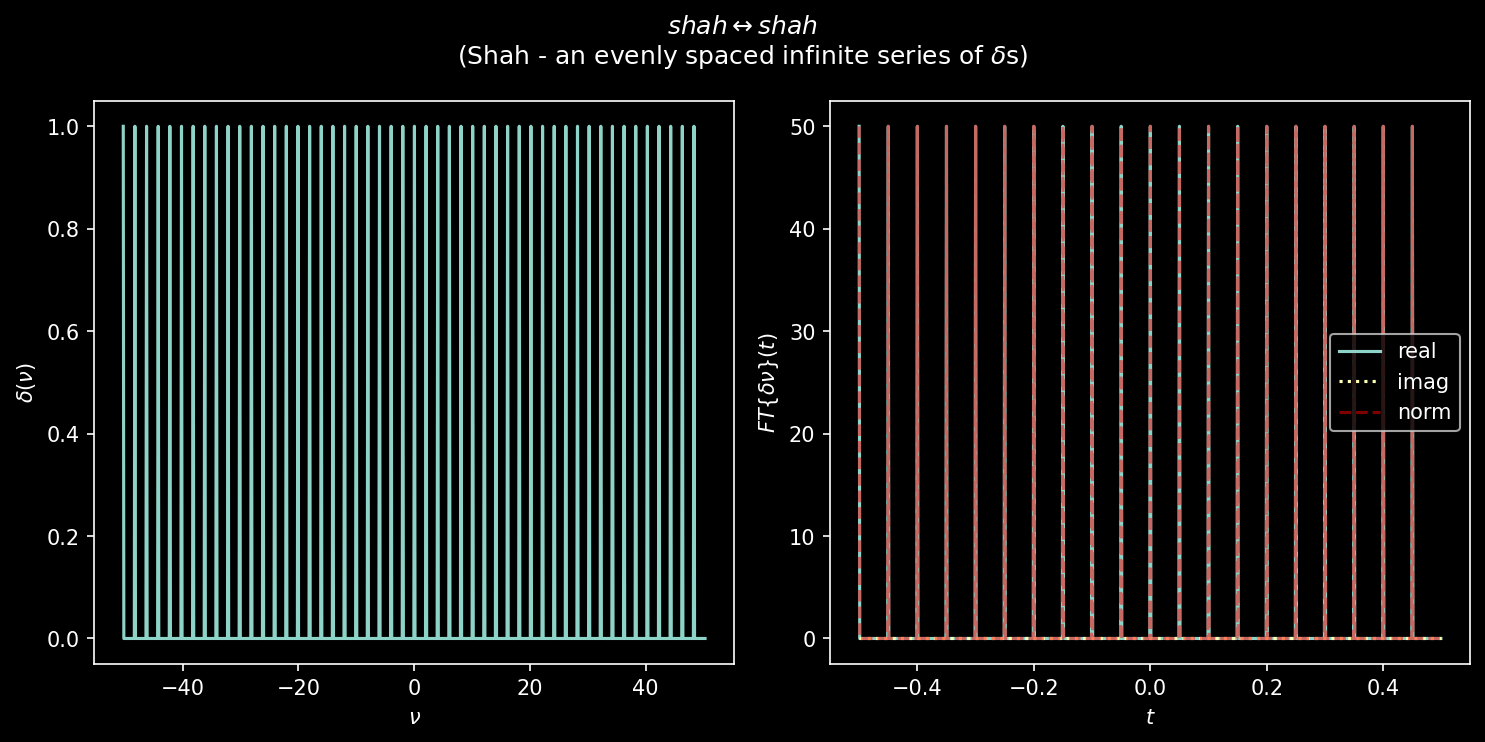

In [168]:
nu = np.linspace(-16*np.pi, 16*np.pi, 1000)
y = np.zeros_like(nu)
y[::20] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size)
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$shah \leftrightarrow shah$"
            "\n(shah function or Dirac comb - an evenly spaced infinite series of $\delta$s)");
pl.tight_layout()

$$F(t) = \int_{-\infty}^{\infty} \cos \nu \left[\cos\left(2 \pi t \nu\right) - i \sin\left(2 \pi t \nu\right) \right] d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \nu \cos\left(2 \pi t \nu\right) - i \cos \nu \sin\left(2 \pi t \nu\right)  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu + \left(2 \pi t \nu\right)\right] + \sin \nu \sin\left(2 \pi t \nu\right)  - i \cos \nu \sin\left(2 \pi t \nu\right)  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu + \left(2 \pi t \nu\right)\right]  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu \left(2 \pi t + 1\right)\right]  d\nu$$

$$F(t) = \delta\left(t-1/(2 \pi)\right)$$

# Visual Fourier Transforms

In [60]:
nu.size

10000

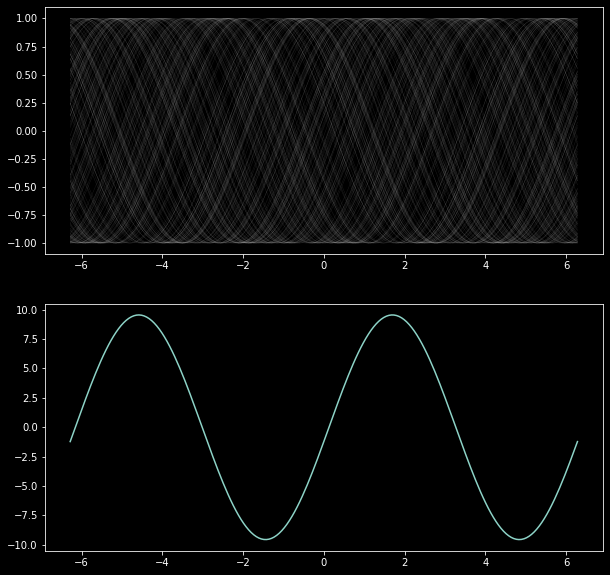

In [133]:
nu = np.linspace(-2*np.pi, 2*np.pi, 200)
zs = np.sin(nu[:,None] + np.random.rand(200)[None,:]*2*np.pi)
pl.figure(figsize=(10,10))
pl.subplot(2,1,1).plot(nu, zs, linewidth=0.5, alpha=0.1, color='w')
pl.subplot(2,1,2).plot(nu, zs.sum(axis=1))

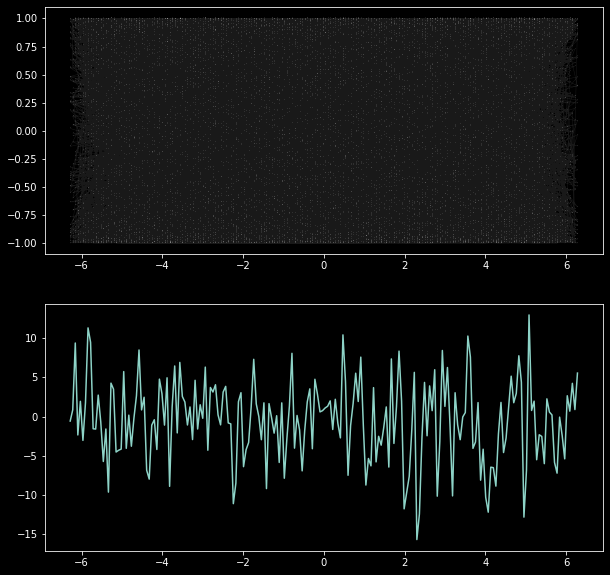

In [161]:
nu = np.linspace(-2*np.pi, 2*np.pi, 200)
nrand = 10000
randnu = np.random.choice(nu, nrand)
zs = np.sin(randnu + np.random.rand(nrand)*2*np.pi)
pl.figure(figsize=(10,10))
pl.subplot(2,1,1).plot(randnu, zs, linewidth=0.5, alpha=0.1, color='w', marker=',')
dx = nu[1] - nu[0]
dx = nu[1] - nu[0]
nubin = [zs[(randnu>=x) & (randnu<(x+dx))].sum() for x in nu]
nubin
pl.subplot(2,1,2).plot(nu, nubin)

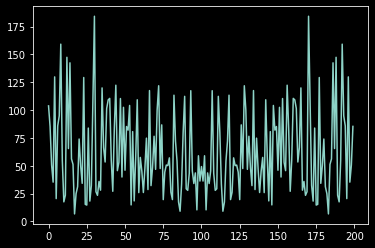

In [162]:
pl.plot(np.abs(np.fft.fft(nubin)))